In [869]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

plt.rc('font', family = 'Malgun Gothic')

wt_df = pd.read_csv('concat기상.csv', encoding='euc-kr')
df    = pd.read_excel('Project_Data1.xlsx')

In [870]:
wt_df = wt_df[['지점명', '일시', '평균기온(°C)', '일강수량(mm)', '가조시간(hr)','합계 일사량(MJ/m2)', '합계 일조시간(hr)', '일 최심적설(cm)', '평균 지면온도(°C)']]
wt_df = wt_df.fillna(0)
wt_df['지점명'] = wt_df['지점명'].replace('서산', '당진')
wt_df.rename(columns= {'지점명' : '위치', '일시' : '일자','평균기온(°C)' : '평균기온', '일강수량(mm)' : '일강수량', '가조시간(hr)' : '가조시간', '합계 일조시간(hr)' : '일조시간', '합계 일사량(MJ/m2)' : '일사량',
                                '일 최심적설(cm)' : '최심적설', '평균 지면온도(°C)' : '지면온도' }, inplace=True)
wt_df['일자'] = pd.to_datetime(wt_df['일자'])

In [871]:
wt_df['위치'].value_counts()

위치
동해     2192
당진     2192
울산     2192
영광군    2192
Name: count, dtype: int64

In [872]:
# B 지역 제외, D지역제외 출력량 극단적   # a, c, e 
df = df.loc[df['위치']!='B']
df = df.loc[df['위치']!='D']


In [873]:
wt_df['위치'] = wt_df['위치'].replace({'당진': 'A', '울산': 'C', '영광군': 'D', '동해': 'E'})
merged_df = pd.merge(df, wt_df, how='inner', on=['일자', '위치'])


In [874]:
merged_df

,위치,일자,현재발전출력,수평일사량1,수평일사량2,경사일사량1,경사일사량2,외기온도1,외기온도2,평균기온,일강수량,가조시간,일사량,일조시간,최심적설,지면온도
0,A,2019-01-01,110.657369,126.177314,154.397648,132.259603,160.382978,14.841146,15.428378,-1.8,0.5,9.7,4.30,2.0,0.0,-0.9
1,A,2019-01-02,328.857233,352.846093,372.683510,382.959001,406.382636,15.685417,14.837355,-4.7,0.0,9.7,11.36,8.9,0.0,-1.6
2,A,2019-01-03,344.740215,388.097375,424.301904,421.362986,459.246443,15.189286,16.407851,-4.1,0.0,9.7,11.51,9.1,0.0,-1.6
3,A,2019-01-04,359.595589,358.813102,383.930114,380.419512,407.340175,15.935537,16.102201,-2.8,0.0,9.7,4.51,0.8,0.0,-1.8
4,A,2019-01-05,358.737685,319.165867,355.007110,338.567568,379.146572,16.579135,16.859500,-2.2,0.0,9.7,11.33,9.0,0.0,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,E,2021-12-27,415.503015,143.892147,71.906009,53.200819,41.760308,6.364743,2.841248,-1.3,0.0,9.6,0.00,8.7,0.0,1.3
6566,E,2021-12-28,434.316347,48.107213,58.232143,118.650293,12.985400,0.195919,4.138122,1.9,0.0,9.6,0.00,8.7,0.0,1.2
6567,E,2021-12-29,794.317377,385.030842,19.093795,422.931986,29.410096,13.174599,0.557669,5.7,0.0,9.6,0.00,3.0,0.0,1.5
6568,E,2021-12-30,5.899518,287.952697,86.338297,472.694232,29.898581,9.994247,4.920187,0.4,0.0,9.6,0.00,8.7,0.0,0.3


In [875]:
#지역별로 일사량 큰값이 많은 컬럼 선택   1번센서 일괄 선택
def keep_larger_column(group, col1, col2):
    count_1_larger = (group[col1] > group[col2]).sum()
    count_2_larger = (group[col2] > group[col1]).sum()
    
    if count_1_larger > count_2_larger:
        group = group.drop(columns=[col2, '경사일사량2', '외기온도2'])
       # group = group.rename(columns={col1: new_col_name})
    else:
        group = group.drop(columns=[col1, '경사일사량1', '외기온도1'])
        #group = group.rename(columns={col2: new_col_name})
    
    return group

merged_df = merged_df.groupby('위치', group_keys=False).apply(keep_larger_column, col1='수평일사량1', col2='수평일사량2')



In [876]:
merged_df

,위치,일자,현재발전출력,수평일사량2,경사일사량2,외기온도2,평균기온,일강수량,가조시간,일사량,일조시간,최심적설,지면온도,수평일사량1,경사일사량1,외기온도1
0,A,2019-01-01,110.657369,154.397648,160.382978,15.428378,-1.8,0.5,9.7,4.30,2.0,0.0,-0.9,NaN,NaN,NaN
1,A,2019-01-02,328.857233,372.683510,406.382636,14.837355,-4.7,0.0,9.7,11.36,8.9,0.0,-1.6,NaN,NaN,NaN
2,A,2019-01-03,344.740215,424.301904,459.246443,16.407851,-4.1,0.0,9.7,11.51,9.1,0.0,-1.6,NaN,NaN,NaN
3,A,2019-01-04,359.595589,383.930114,407.340175,16.102201,-2.8,0.0,9.7,4.51,0.8,0.0,-1.8,NaN,NaN,NaN
4,A,2019-01-05,358.737685,355.007110,379.146572,16.859500,-2.2,0.0,9.7,11.33,9.0,0.0,-0.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,E,2021-12-27,415.503015,NaN,NaN,NaN,-1.3,0.0,9.6,0.00,8.7,0.0,1.3,143.892147,53.200819,6.364743
6566,E,2021-12-28,434.316347,NaN,NaN,NaN,1.9,0.0,9.6,0.00,8.7,0.0,1.2,48.107213,118.650293,0.195919
6567,E,2021-12-29,794.317377,NaN,NaN,NaN,5.7,0.0,9.6,0.00,3.0,0.0,1.5,385.030842,422.931986,13.174599
6568,E,2021-12-30,5.899518,NaN,NaN,NaN,0.4,0.0,9.6,0.00,8.7,0.0,0.3,287.952697,472.694232,9.994247


In [877]:
def combine_columns(group):
    group['수평일사량'] = group[['수평일사량1', '수평일사량2']].apply(lambda x: x[0] if pd.notna(x[0]) else x[1], axis=1)
    group['경사일사량'] = group[['경사일사량1', '경사일사량2']].apply(lambda x: x[0] if pd.notna(x[0]) else x[1], axis=1)
    group['외기온도'] = group[['외기온도1', '외기온도2']].apply(lambda x: x[0] if pd.notna(x[0]) else x[1], axis=1)
    
    group = group.drop(columns=['수평일사량1', '수평일사량2', '경사일사량1', '경사일사량2', '외기온도1', '외기온도2'])
    return group
merged_df = merged_df.groupby('위치', group_keys=False).apply(combine_columns)

# 결과 확인
merged_df

,위치,일자,현재발전출력,평균기온,일강수량,가조시간,일사량,일조시간,최심적설,지면온도,수평일사량,경사일사량,외기온도
0,A,2019-01-01,110.657369,-1.8,0.5,9.7,4.30,2.0,0.0,-0.9,154.397648,160.382978,15.428378
1,A,2019-01-02,328.857233,-4.7,0.0,9.7,11.36,8.9,0.0,-1.6,372.683510,406.382636,14.837355
2,A,2019-01-03,344.740215,-4.1,0.0,9.7,11.51,9.1,0.0,-1.6,424.301904,459.246443,16.407851
3,A,2019-01-04,359.595589,-2.8,0.0,9.7,4.51,0.8,0.0,-1.8,383.930114,407.340175,16.102201
4,A,2019-01-05,358.737685,-2.2,0.0,9.7,11.33,9.0,0.0,-0.7,355.007110,379.146572,16.859500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,E,2021-12-27,415.503015,-1.3,0.0,9.6,0.00,8.7,0.0,1.3,143.892147,53.200819,6.364743
6566,E,2021-12-28,434.316347,1.9,0.0,9.6,0.00,8.7,0.0,1.2,48.107213,118.650293,0.195919
6567,E,2021-12-29,794.317377,5.7,0.0,9.6,0.00,3.0,0.0,1.5,385.030842,422.931986,13.174599
6568,E,2021-12-30,5.899518,0.4,0.0,9.6,0.00,8.7,0.0,0.3,287.952697,472.694232,9.994247


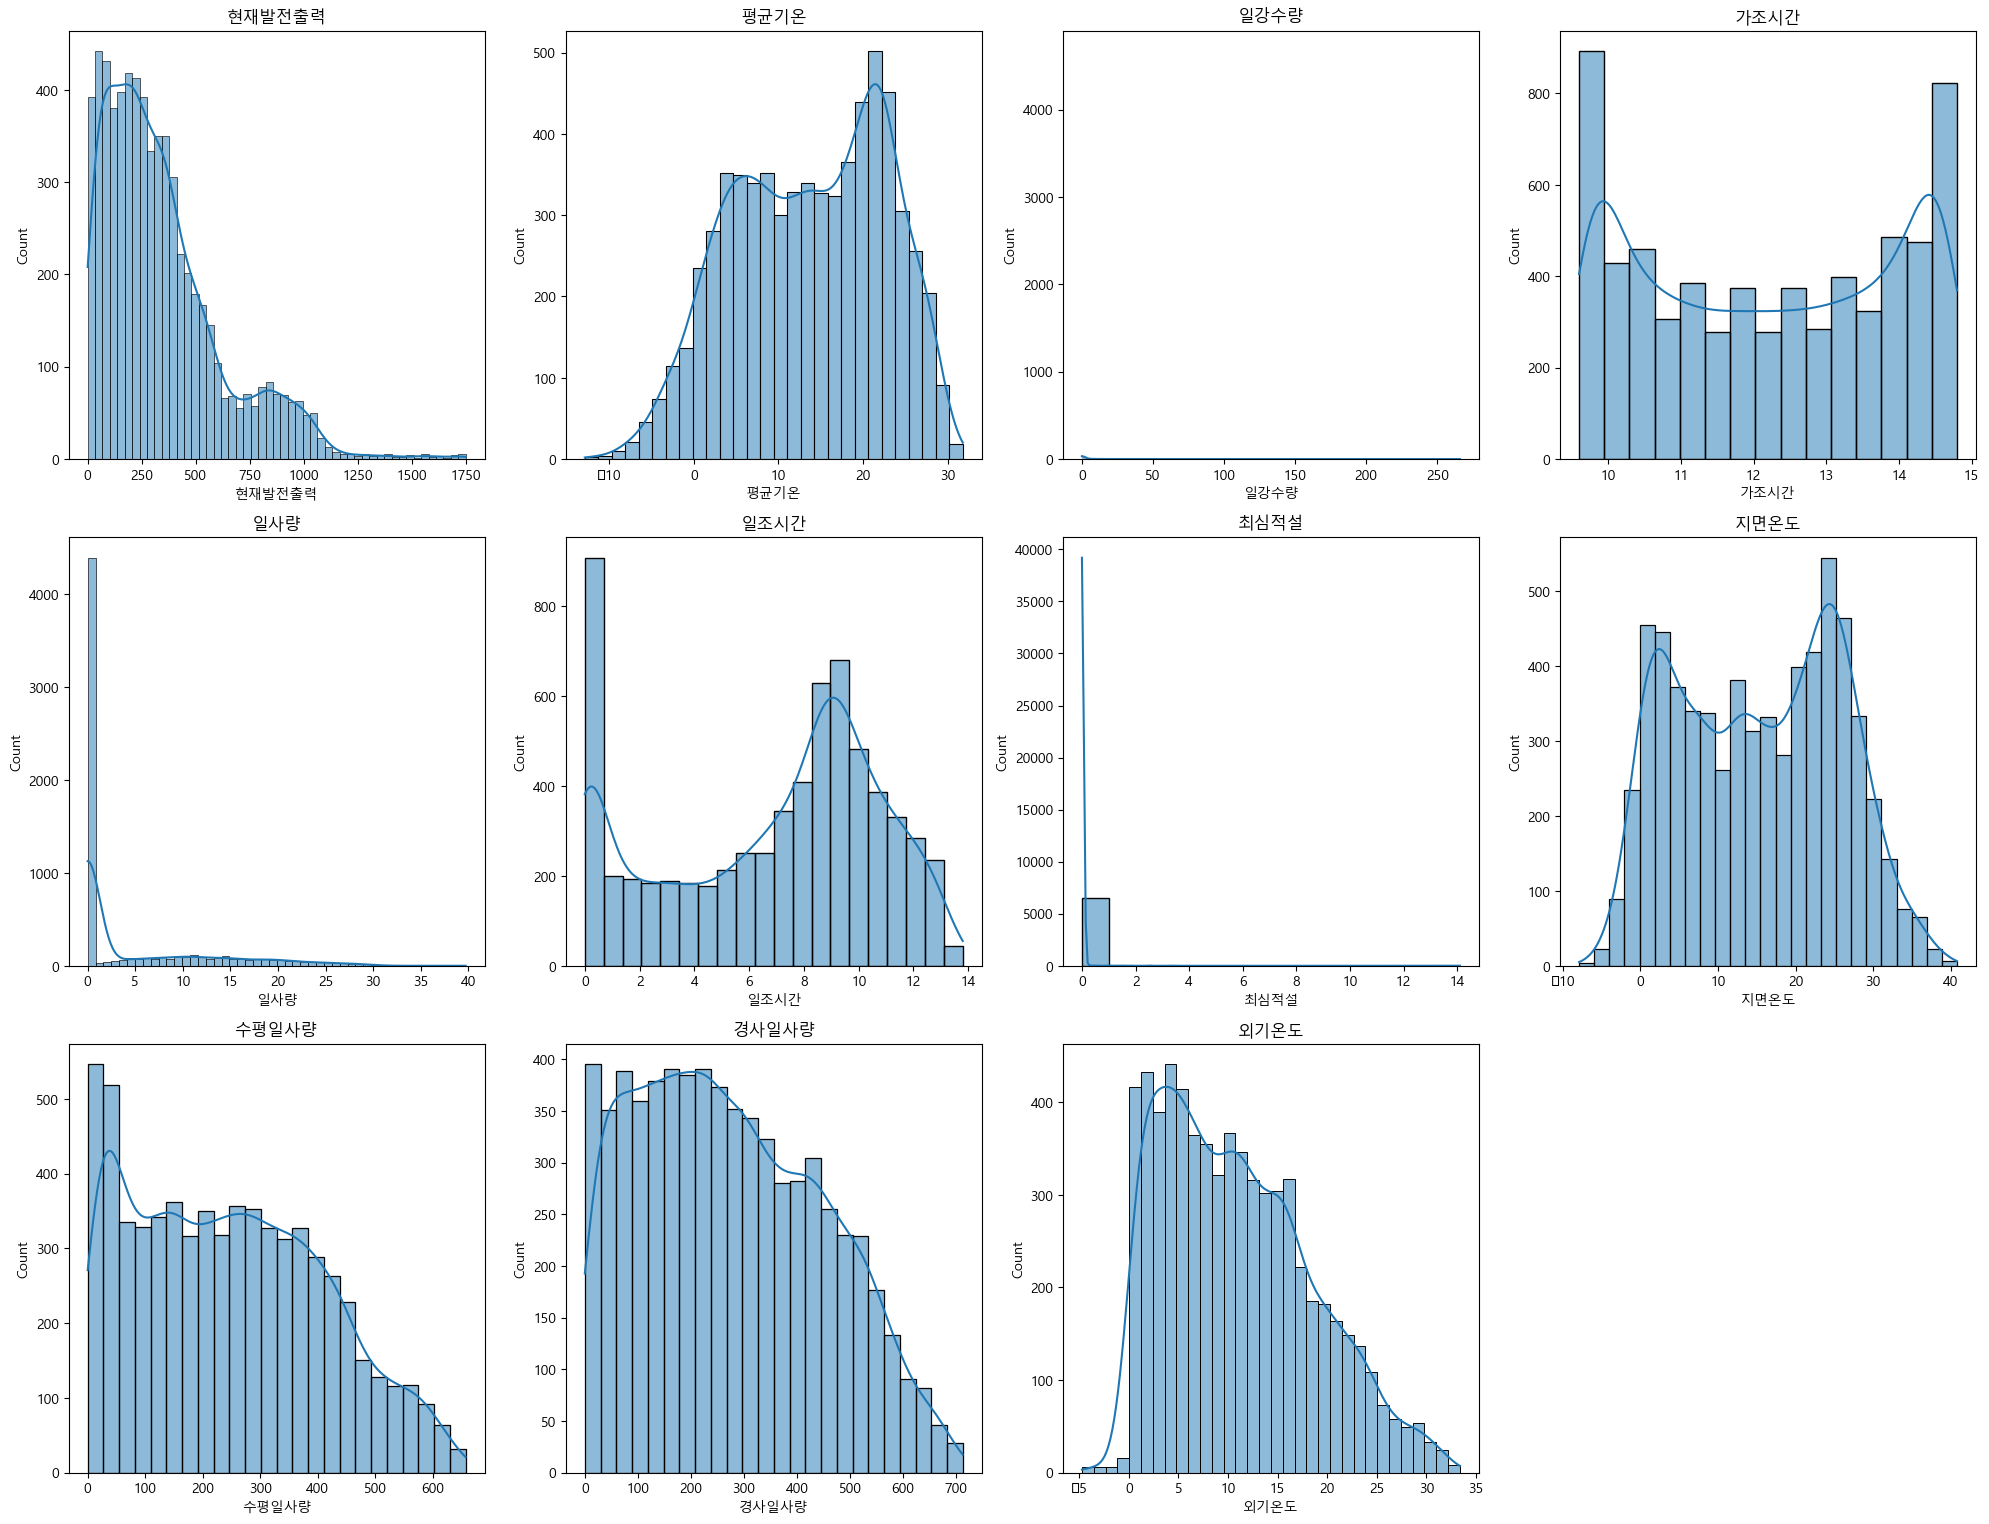

In [878]:


numeric_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 20))

icount = 1

for col in numeric_cols:
    plt.subplot(4, 4, icount)
    sns.histplot(merged_df[col], kde=True)
    plt.title(col)
    icount += 1

plt.tight_layout()
plt.show()


In [879]:


merged_df['월'] = merged_df['일자'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return '겨울'
    elif month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'

merged_df['계절'] = merged_df['월'].apply(get_season)

df_dummy = pd.get_dummies(merged_df['계절'], prefix='계절')

merged_df = pd.concat([merged_df, df_dummy], axis=1)

merged_df.head()


,위치,일자,현재발전출력,평균기온,일강수량,가조시간,일사량,일조시간,최심적설,지면온도,수평일사량,경사일사량,외기온도,월,계절,계절_가을,계절_겨울,계절_봄,계절_여름
0,A,2019-01-01,110.657369,-1.8,0.5,9.7,4.30,2.0,0.0,-0.9,154.397648,160.382978,15.428378,1,겨울,False,True,False,False
1,A,2019-01-02,328.857233,-4.7,0.0,9.7,11.36,8.9,0.0,-1.6,372.683510,406.382636,14.837355,1,겨울,False,True,False,False
2,A,2019-01-03,344.740215,-4.1,0.0,9.7,11.51,9.1,0.0,-1.6,424.301904,459.246443,16.407851,1,겨울,False,True,False,False
3,A,2019-01-04,359.595589,-2.8,0.0,9.7,4.51,0.8,0.0,-1.8,383.930114,407.340175,16.102201,1,겨울,False,True,False,False
4,A,2019-01-05,358.737685,-2.2,0.0,9.7,11.33,9.0,0.0,-0.7,355.007110,379.146572,16.859500,1,겨울,False,True,False,False


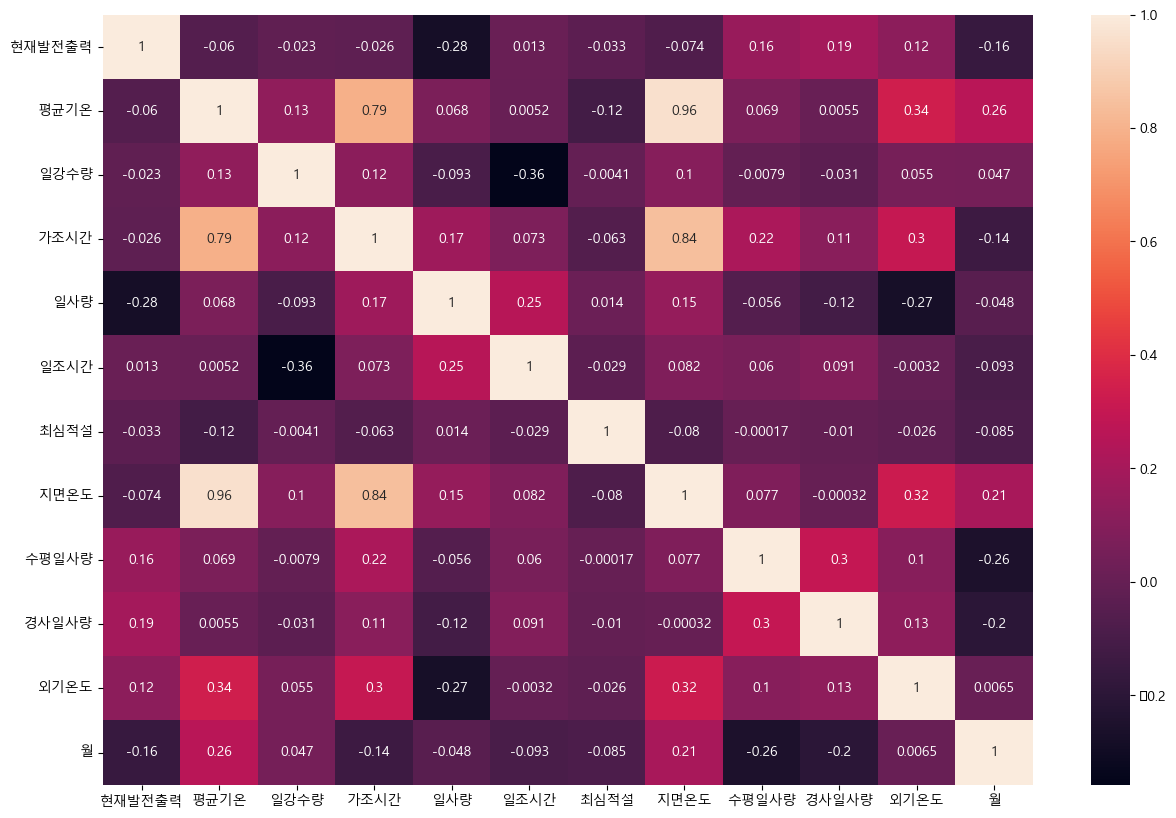

In [880]:
import numpy as np
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(15,10))

cols = merged_df[numeric_cols].corr().index

corr_mat = np.corrcoef(merged_df[cols].values.T)


hm = sns.heatmap(corr_mat, annot=True, yticklabels = cols.values, xticklabels=cols.values)

plt.show()

In [881]:
# 수평일사량을 사용하지 않은 이유는 수평일사량은 지표면에 도달하는 일사량을 의미하며,
#  이는 패널이 설치된 각도와는 무관하게 모든 방향에서 도달하는 태양 에너지를 포함
#  따라서 패널의 실제 발전 능력을 평가하는 데는 애매하다.

# 경사일사량 단위 변환: W/m² -> kWh/m²
# 1000으로 나눠서 단위를 kWh/m²
# 단위 변환된 경사일사량을 사용하여 효율성을 재계산
merged_df['효율성'] = merged_df['현재발전출력'] / merged_df['경사일사량']

#merged_df['효율성'] = merged_df['현재발전출력'] / merged_df['경사일사량']

data = merged_df[merged_df['경사일사량'] != 0]

# 하위 30% 저효율 기준으로 설정
low_efficiency_threshold = data['효율성'].quantile(0.3)


low_efficiency_periods = data[data['효율성'] < low_efficiency_threshold]

efficiency_summary = {
    '평균 효율성': data['효율성'].mean(),
    '최소 효율성': data['효율성'].min(),
    '최대 효율성': data['효율성'].max(),
    '낮은 효율성 기준 10% quantile': low_efficiency_threshold,
    '낮은 효율성 기간 수': low_efficiency_periods.shape[0]
}

efficiency_summary, low_efficiency_periods.head()


({'평균 효율성': 7.125310712300963,
  '최소 효율성': 0.00010526682251499618,
  '최대 효율성': 9884.580592780489,
  '낮은 효율성 기준 10% quantile': 0.7186928174073414,
  '낮은 효율성 기간 수': 1971},
    위치         일자      현재발전출력  평균기온  일강수량  가조시간    일사량  일조시간  최심적설  지면온도  \
 0   A 2019-01-01  110.657369  -1.8   0.5   9.7   4.30   2.0   0.0  -0.9   
 27  A 2019-01-28   25.810807   1.6   0.0  10.2  12.66   8.2   0.0   2.2   
 29  A 2019-01-30   63.127015   1.5   0.0  10.3  12.32   7.9   0.0   2.7   
 31  A 2020-01-01   92.739096  -0.3   0.2   9.7   6.18   3.2   0.0   0.9   
 34  A 2020-01-04  171.511981   0.1   0.0   9.7   7.74   5.8   0.0   1.4   
 
          수평일사량       경사일사량       외기온도  월  계절  계절_가을  계절_겨울   계절_봄  계절_여름  \
 0   154.397648  160.382978  15.428378  1  겨울  False   True  False  False   
 27  376.995195   58.145012   5.493972  1  겨울  False   True  False  False   
 29  164.694963  163.577712   7.553494  1  겨울  False   True  False  False   
 31    2.537625  342.974655   1.547185  1  겨울  False   True  Fal

In [883]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 외기온도가 25도 이상일 경우 효율성이 0.5%씩 감소하는 것을 반영
temperature_threshold = 25

data['효율성'] = data['현재발전출력'] / data['경사일사량']
data['효율성'] = np.where(
    data['외기온도'] > temperature_threshold,
    data['효율성'] * (1 - 0.005 * (data['외기온도'] - temperature_threshold)),
    data['효율성']
)


efficiency_threshold =  data['효율성'].quantile(0.3)
data['효율성_라벨'] = np.where(data['효율성'] < efficiency_threshold, 0, 1)

features = ['평균기온', '일강수량', '가조시간', '일조시간','일사량', '외기온도', '계절_봄','계절_여름','계절_가을','계절_겨울', '수평일사량', '경사일사량']
X = data[features]
y = data['효율성_라벨']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42 )
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
classification_rep_adjusted = classification_report(y_test, y_pred)

feature_importances_adjusted = clf.feature_importances_

importance_df_adjusted = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances_adjusted
}).sort_values(by='Importance', ascending=False)

report_dict_adjusted = classification_report(y_test, y_pred, output_dict=True)
classification_df_adjusted = pd.DataFrame(report_dict_adjusted).transpose()
classification_df_adjusted


,precision,recall,f1-score,support
0,0.528455,0.343008,0.416000,379.000000
1,0.766854,0.875936,0.817773,935.000000
accuracy,0.722222,0.722222,0.722222,0.722222
macro avg,0.647655,0.609472,0.616887,1314.000000
weighted avg,0.698092,0.722222,0.701889,1314.000000


In [884]:
# voting
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


models = [
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("SVM", SVC(probability=True, random_state=42)),  
    ("KNN", KNeighborsClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42))
]

voting_clf = VotingClassifier(estimators=models, voting='soft')

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)
print("Voting Classifier (Soft Voting) Results")
print(classification_report(y_test, y_pred))


Voting Classifier (Soft Voting) Results
              precision    recall  f1-score   support

           0       0.61      0.27      0.37       379
           1       0.76      0.93      0.84       935

    accuracy                           0.74      1314
   macro avg       0.69      0.60      0.60      1314
weighted avg       0.72      0.74      0.70      1314



In [ ]:
#외기온도 낮고 일사량 높을수록 효율이 좋다

Feature Importances:
    Feature  Importance
11   경사일사량    0.242255
10   수평일사량    0.150457
5     외기온도    0.142413
0     평균기온    0.128982
3     일조시간    0.109219
2     가조시간    0.096881
4      일사량    0.056083
1     일강수량    0.045094
8    계절_가을    0.008707
6     계절_봄    0.008044
7    계절_여름    0.005976
9    계절_겨울    0.005890


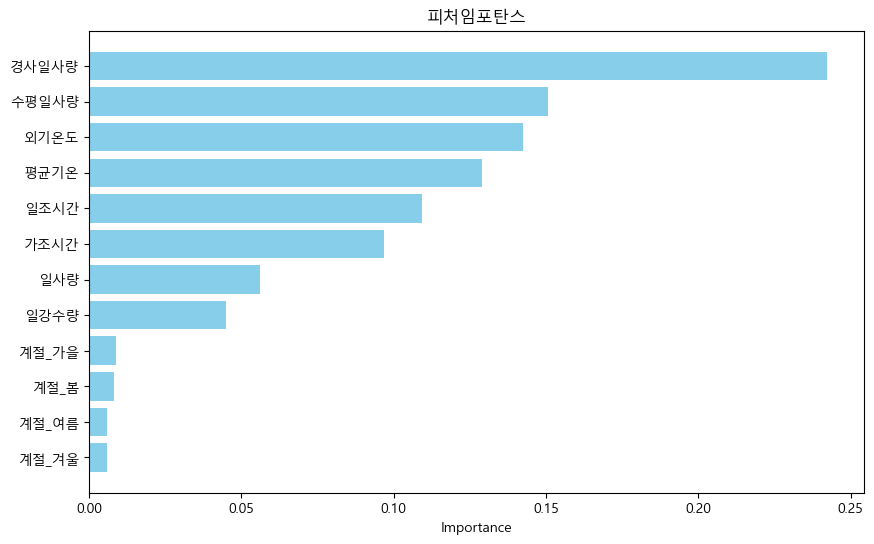

In [885]:

feature_importances = clf.feature_importances_

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('피처임포탄스')
plt.gca().invert_yaxis() 
plt.show()
#sum = 1

In [ ]:
#외기온도 ->  전압 
#일사량   -> 전류의 크기
# 옴의법칙
# 직렬로 연결하면 전압이 증가하고. 전류가 일정하다
# 병렬로 연결하면 전류가 증가한다. 전압이 일정하다

# 데이터상에서 외기온도 보다 일사량에 영향을 더많이 받는걸로 병렬연결이다.
# 병렬연결 -> 열점현상이 직렬연결보다 발생빈도가 현저히 낮다.

In [ ]:
cluster_df.reset_index(drop=True)
data_cleaned = cluster_df.drop(columns=[ '계절_봄', '계절_여름', '계절_가을', '계절_겨울'])

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_cleaned)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
#kmeans

kmeans_5 = KMeans(n_clusters=5, random_state=42)
clusters_5 = kmeans_5.fit_predict(data_scaled)

data['Cluster'] = clusters_5




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
#pca

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_df['Cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, s=100, alpha=0.7)
plt.title('Clusters Visualization with PCA')
plt.show()


In [ ]:
loading_values = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=data_cleaned.columns)
#로딩 값의 절대값 크기:
#로딩 값의 절대값이 클수록, 해당 특성이 그 주성분에 더 큰 영향을 미친다
# pca1 은 기온관련 pca2는 일조와 일사관련 특성들에 의해 결정됨.
loading_values